# Exercises

There are three exercises in this notebook:

1. Use the cross-validation method to test the linear regression with different $\alpha$ values, at least three.
2. Implement a SGD method that will train the Lasso regression for 10 epochs.
3. Extend the Fisher's classifier to work with two features. Use the class as the $y$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

## 1. Cross-validation linear regression

You need to change the variable ``alpha`` to be a list of alphas. Next do a loop and finally compare the results.

alpha 0.0: MSE 372
alpha 0.1: MSE 426
alpha 0.2: MSE 476


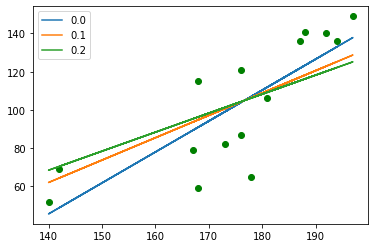

In [2]:
def MSE(A, B):
    return np.square(np.subtract(A, B)).mean()

x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.asmatrix(np.c_[np.ones((15,1)),x])

I = np.identity(2)
alpha = 0.1 # change here
alphas = alpha * np.arange(3)

# add 1-3 line of code here
for alpha in alphas:
    w = np.linalg.inv(x.T*x + alpha * I)*x.T*y
    #w=w.ravel()
    w = np.ravel(w)
    plt.plot(x[:,1], x[:,1]*w[1]+w[0], label=alpha)
    tmp = (x[:,1]*w[1]+w[0] - y)
    error = MSE(y, x[:,1]*w[1]+w[0])
    print(f'alpha {alpha:.1f}: MSE {error:.0f}')

# add 1-3 lines to compare the results
plt.scatter([x[:,1]], y, color='g')
plt.legend()
plt.show()



# 2. Implement based on the Ridge regression example, the Lasso regression.

Please implement the SGD method and compare the results with the sklearn Lasso regression results. 

$$\sum_{i=1}^{M}(y_{i}-\sum_{j=0}^{p}w_{j}\dot x_{ij})^{2} + \lambda\sum_{j=0}^{p}|w_{j}|$$

$$J(w) = RSS(w) + \lambda * |w|$$

$$
\begin{align}
\frac{\delta}{\delta w_j} RSS(w) & = a_j w_j - c_j \\
a_j & = 2 \sum_i x_{ij}^2 \\
c_j & = 2 \sum_i x_{ij} ( y_i - w_{\_j}^T x_{i\_j} ) & \text{$w_{\_j}$ => all others, but no $w_j$} \\
 & = 2 \sum_i x_{ij} (y_i - w^T x_i + w_j x_{ij}) \\
 & = 2 ( \sum_i ( x_{ij} y_i ) - \sum_i ( x_{ij} w^T x_i ) + \sum_i x_{ij} w_j x_{ij}) \\
 & = 2 \sum_i x_{ij} ( y_i - w^T x_i ) + 2 * \sum_i x_{ij}^2 w_j \\
 & = 2 \sum_i x_{ij} ( y_i - w^T x_i ) + a_j w_j & \text{WHY?! it cancels $a_j$ from beggining} \\
 w^T x_i & = pred_i \\
\frac{\delta}{\delta w_j} RSS(w) & = a_j w_j - (2 \sum_i x_{ij} ( y_i - w^T x_i ) + a_j w_j)\\
  & = -2 \sum_i x_{ij} ( y_i - pred_i ) \\
  \\
\frac{\delta}{\delta w_j} J(w) & = -2 \sum_i x_{ij} ( y_i - pred_i ) \pm \lambda
\end{align}
$$

[[-4.85034187  2.44255733]]
[0.]
[77.20806383]
[-50.95112581]
[84.1417378]
[-16.6253996]
[30.79126762]
[6.93067945]
[43.49124916]
[-1.90744513]
[-1.90956317]
[-3.82319297]
[-5.38316946]
[7.18592198]
[14.18835657]
[3.81157901]
[25.06490005]
[4.58478177]
[19.45338595]
[7.89165014]
[15.24191391]
[28.17881214]
[7.07897753]
[13.44172271]
[23.95819863]
[16.09056583]
[25.58638489]
[8.9958182]
[9.13266946]
[17.89304911]
[17.18891582]
[20.19436044]
[6.42314056]
[26.15316223]
[4.17435146]
[23.57376935]
[11.75436013]
[1.55864495]
[12.46915963]
[10.7008689]
[23.01847732]
[44.44163157]
[-10.6913155]
[28.14154027]
[23.25666948]
[2.36064894]
[14.22074643]
[46.6948888]
[-15.33481825]
[12.06412669]
[30.49402918]
[10.31929408]
[10.66014468]
[22.86831768]
[11.664466]
[15.26459999]
[10.64042081]
[4.59955045]
[3.99948975]
[15.04289078]
[20.74705052]
[23.39904802]
[11.1433853]
[22.38004239]
[13.56792987]
[9.89146884]
[9.82436517]
[21.20343097]
[27.18498262]
[1.87457171]
[3.44234599]
[3.5377811]
[8.19700822]

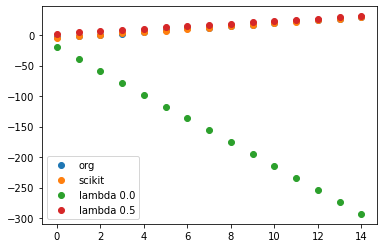

In [12]:
rng = np.random.default_rng()

def sgd(x, y, l, alpha=0.01, num=200):
    w = np.array([[0., 0.]]) # new weights
    for _ in range(num):
        j = np.random.randint(y.size)
        pred = x[j] @ w.T
        print(pred)
        grad = -2 * x[j, 1] * (y[j] - pred)
        w = w - alpha * grad
    return w

N = 15
x = np.arange(N).reshape(-1,1)
x = np.insert(x, 0, 1, axis=1)
w = np.array([[-5, 2.5]])
y = x @ w.T
y = y + rng.normal(0, 1, size=y.shape)
plt.scatter([x[:,1]], [y], label='org')


lasso_regression = Lasso(alpha=0.01)
lasso_regression.fit(x[:,1:], y)
w_l = np.stack((lasso_regression.intercept_, lasso_regression.coef_), axis=1)
print(w_l)
plt.scatter([x[:,1]], [x @ w_l.T], label=f'scikit')

for lam in [0, 0.5]:
    #print(f'lambda = {lam:.1f}:')
    tmp = sgd(x, y, lam)
    #print('  w:', tmp)
    #print('  pred:', (x @ tmp.T).T)
    #print('  org:', y.T)
    plt.scatter([x[:,1]], [x @ tmp.T], label=f'lambda {lam:.1f}')

plt.legend()
plt.show()

In [13]:
x = np.array([188, 181, 197, 168, 167, 187, 178, 194, 140, 176, 168, 192, 173, 142, 176]).reshape(-1, 1).reshape(15,1)
y = np.array([141, 106, 149, 59, 79, 136, 65, 136, 52, 87, 115, 140, 82, 69, 121]).reshape(-1, 1).reshape(15,1)

x = np.c_[np.ones((15,1)),x]

I = np.identity(2)
alpha = 0.1 

w2 = np.linalg.inv(x.T @ x + alpha * I) @ x.T @ y # update this line
w2 = w2.ravel()
w = sgd(x, y, 0.5, num=200)
print(w2)
print(w)

[0.]
[89177.92]
[-56195435.54560001]
[3.7147437e+10]
[-2.37599372e+13]
[1.61455196e+16]
[-1.01904234e+19]
[6.04977577e+21]
[-3.57185324e+24]
[2.00066643e+27]
[-1.3207228e+30]
[9.82228749e+32]
[-5.27381586e+35]
[2.64451403e+38]
[-1.61711226e+41]
[1.07808153e+44]
[-7.52432984e+46]
[4.73223129e+49]
[-2.84426029e+52]
[1.78811256e+55]
[-1.21507082e+58]
[8.57663428e+60]
[-6.21513382e+63]
[4.02793097e+66]
[-2.41829253e+69]
[1.67614422e+72]
[-1.13010285e+75]
[6.55815052e+77]
[-3.67335127e+80]
[2.16774167e+83]
[-1.36365843e+86]
[6.93121832e+88]
[-3.41669706e+91]
[1.99456092e+94]
[-1.26439536e+97]
[8.02316793e+99]
[-5.05914954e+102]
[3.28760975e+105]
[-2.01005367e+108]
[1.25033378e+111]
[-7.86545849e+113]
[5.08819058e+116]
[-3.45756305e+119]
[1.84654392e+122]
[-9.83479103e+124]
[6.57463523e+127]
[-4.41673563e+130]
[3.23379362e+133]
[-2.48104606e+136]
[1.728014e+139]
[-1.02631106e+142]
[6.47158473e+144]
[-3.4078718e+147]
[1.73225266e+150]
[-1.13954509e+153]
[5.89001553e+155]
[-2.38616309e+158]
[1

<ipython-input-12-62916ccbd7d7>:9: RuntimeWarning: overflow encountered in multiply
  grad = -2 * x[j, 1] * (y[j] - pred)
<ipython-input-12-62916ccbd7d7>:10: RuntimeWarning: invalid value encountered in subtract
  w = w - alpha * grad


## 3. Extend the Fisher's classifier

Please extend the targets of the ``iris_data`` variable and use it as the $y$.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
print(iris_df.head())

x = iris_df[['sepal width (cm)', 'petal width (cm)']].values # change here
y = iris_df[['sepal length (cm)', 'petal length (cm)']].values # change here

dataset_size = np.size(x)

mean_x, mean_y = np.mean(x), np.mean(y)

SS_xy = np.sum(y * x) - dataset_size * mean_y * mean_x
SS_xx = np.sum(x * x) - dataset_size * mean_x * mean_x

a = SS_xy / SS_xx
b = mean_y - a * mean_x


y_pred = a * x + b

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


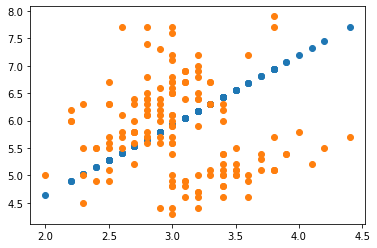

In [6]:
plt.scatter(x[:,0], y_pred[:,0])
plt.scatter(x[:,0], y[:,0])
plt.show()

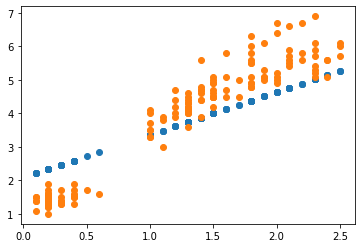

In [7]:
plt.scatter(x[:,1], y_pred[:,1])
plt.scatter(x[:,1], y[:,1])
plt.show()